In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [2]:
cars= pd.read_csv('/content/Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

#Correlation Matrix

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


#Scatter Plot between variables

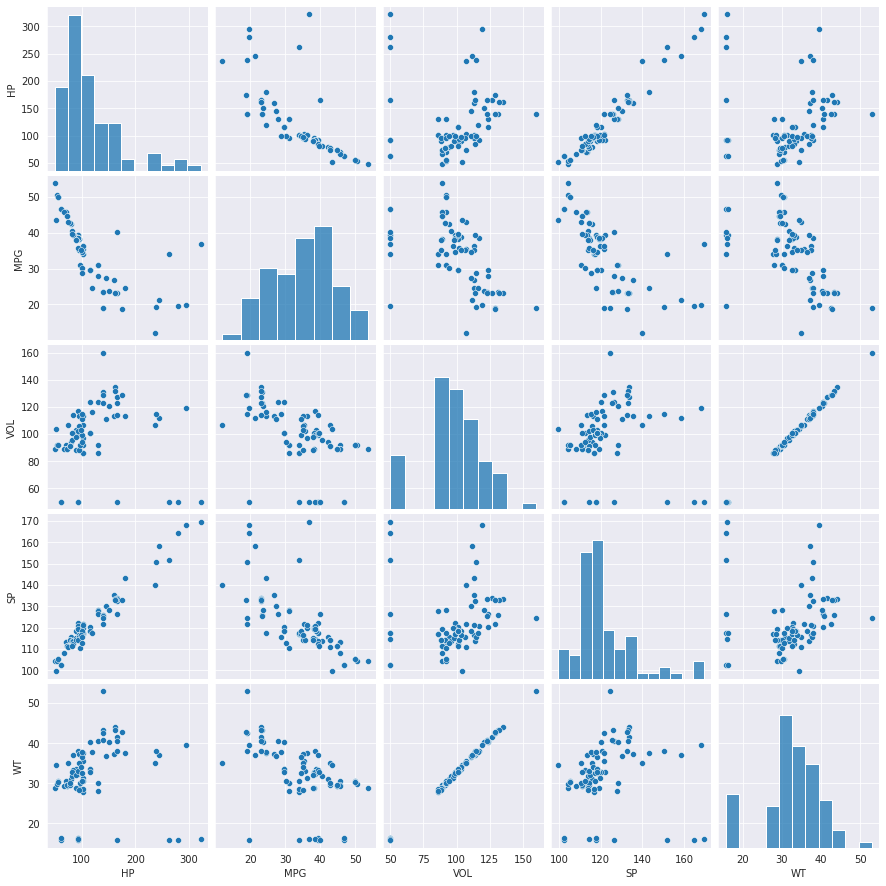

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

#Preparing model

In [7]:
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [8]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [9]:
print(model.tvalues,model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

#Simple Linear Regression Models

In [11]:
ml_v=smf.ols('MPG~VOL',data=cars).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [12]:
ml_w=smf.ols('MPG~WT',data=cars).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [13]:
ml_wv=smf.ols('MPG~WT+VOL',data=cars).fit()
print(ml_wv.tvalues,'\n',ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [14]:
rsq_hp= smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_wt= smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_vol= smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp= smf.ols('SP~WT+HP+VOL',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)

In [15]:
d1={'Variable':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame= pd.DataFrame(d1)
Vif_frame

,Variable,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


#Subset Selection
##AIC value

In [16]:
model=smf.ols('MPG~WT+SP+HP',data=cars).fit()
print(model.aic,rsq_wt)

476.29927501529767 0.9984363610296332


In [17]:
model=smf.ols('MPG~VOL+SP+HP',data=cars).fit()
print(rsq_vol,model.aic)

0.9984345797174133 475.9875158854609


#Residual Analysis
Test for Normality of Residuals (Q-Q Plot)

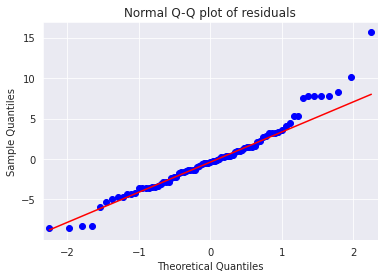

In [18]:
import statsmodels.api as sm
model=smf.ols('MPG~VOL+SP+HP',data=cars).fit()
qqplot= sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [19]:
list(np.where(model.resid>10))

[array([ 0, 76])]

#Residual Plot for Homoscedasticity: Constant Variance

In [20]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(*args, **kw)>

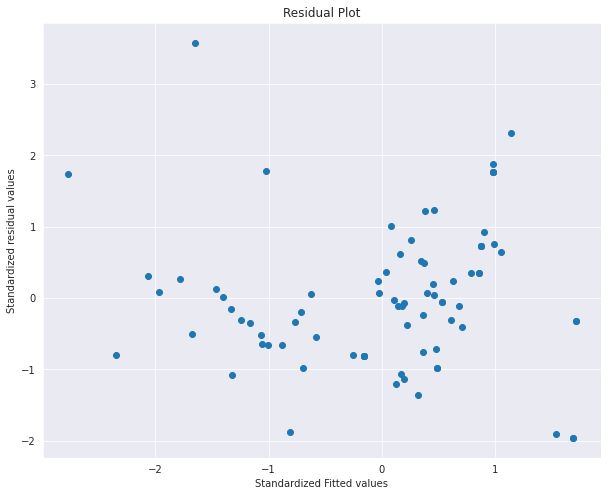

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show

#Residual VS Regressors

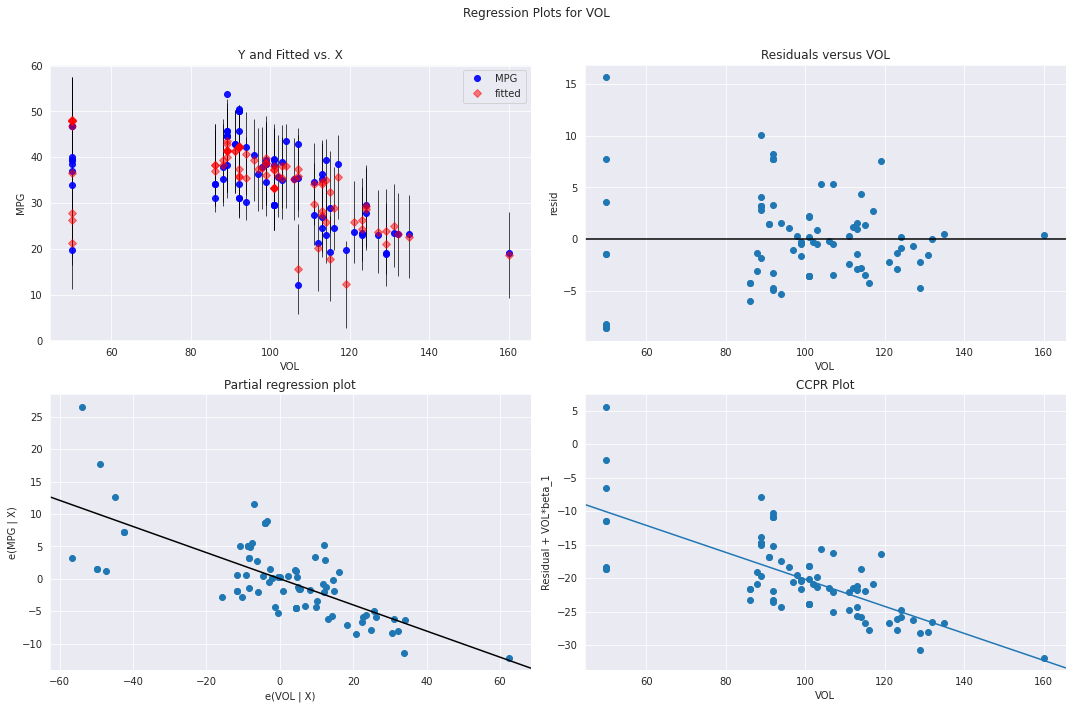

In [22]:
fig= plt.figure(figsize=(15,10))
fig= sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

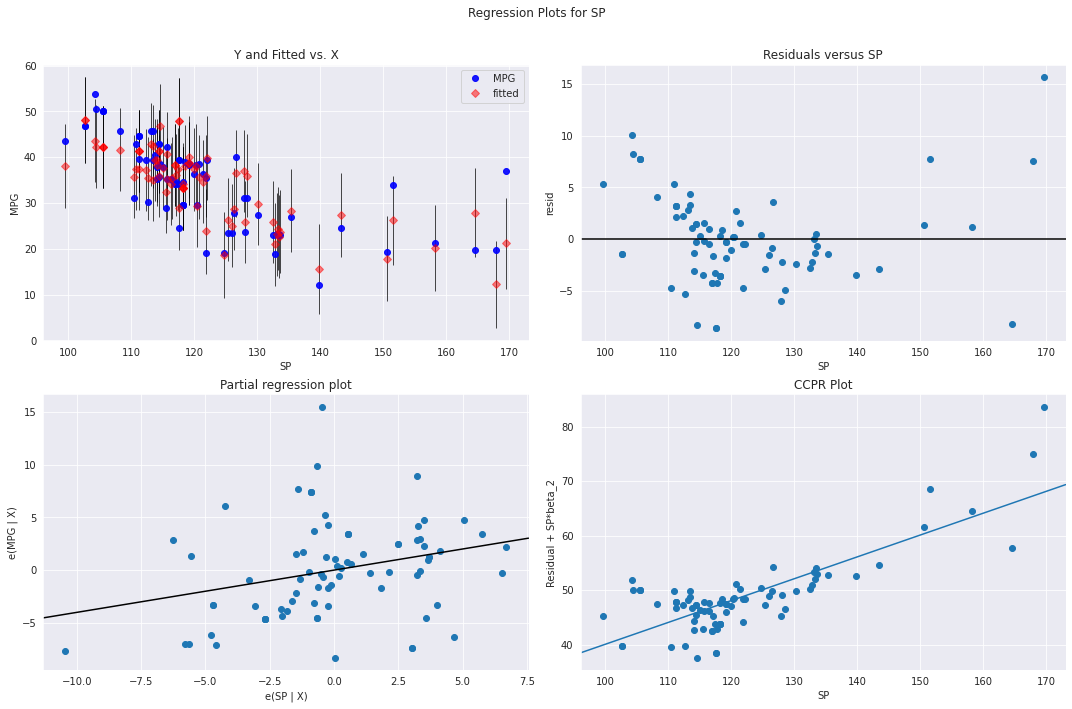

In [23]:
fig= plt.figure(figsize=(15,10))
fig= sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

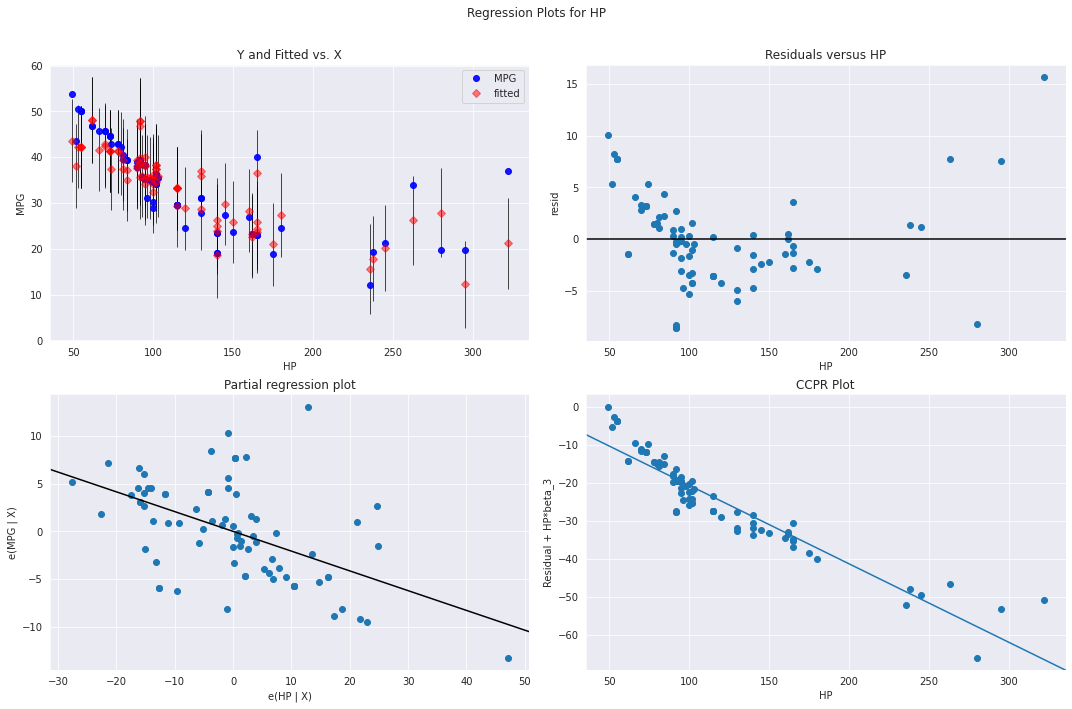

In [24]:
fig= plt.figure(figsize=(15,10))
fig= sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

#Model Deletion Diagnostics
##Detecting Influencers/ Outliers
##Cook's Distance

In [25]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence= model.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-26-2a58f9f3c6e9>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars)),np.round(c,3))


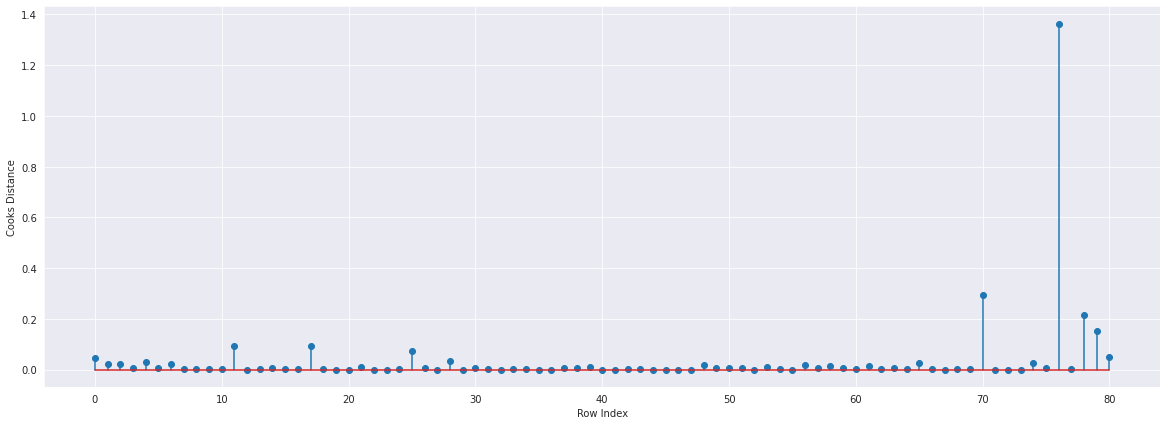

In [26]:
#Plot the influence values using stem plot

fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(76, 1.364174386910332)

#High Influence points

In [29]:
cars.shape

(81, 5)

In [31]:
k=cars.shape[1]
n=cars.shape[0]
leverage_cutoff= 3*(k+1)/n
leverage_cutoff

0.2222222222222222

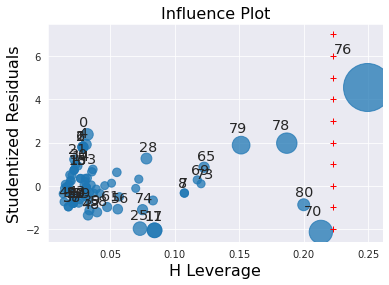

In [38]:
influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [40]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [42]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#Improving the model

In [44]:
cars_new=pd.read_csv('Cars.csv')

In [46]:
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [48]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [ ]:
car1=car1.drop(['index'],axis=1)

In [53]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


#Build Model

In [55]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data=car1).fit()

In [57]:
final_ml_V.rsquared,final_ml_V.aic

(0.8161692010376008, 446.1172263944772)

In [59]:
final_ml_W= smf.ols('MPG~WT+SP+HP',data=car1).fit()

In [60]:
final_ml_W.rsquared,final_ml_W.aic

(0.8160034320495303, 446.1884323575032)

Comparing above R-square and AIC values, model 'final_ml_V' has high R-squared and Low AIC value hence include variable 'VOL' collinearity problem would be resolved and discard 'WT

In [63]:
model_influence_V= final_ml_V.get_influence()
(c_V,_)=model_influence_V.cooks_distance

<ipython-input-65-1a3c234e8803>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car1)),np.round(c_V,3))


Text(0, 0.5, 'Cooks Distance')

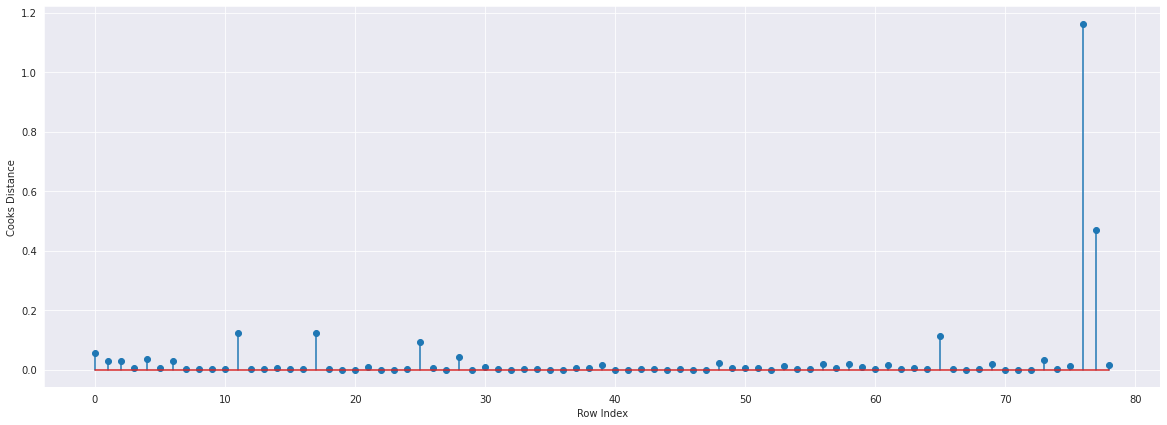

In [65]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [68]:
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135182)

In [70]:
car2=car1.drop(car1.index[[76,77]],axis=0)

In [73]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [75]:
car3=car2.reset_index()

In [77]:
car4=car3.drop(['index'],axis=1)

In [79]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [81]:
final_ml_V=smf.ols('MPG~VOL+SP+HP',data=car4).fit()

In [83]:
model_influence_V=final_ml_V.get_influence()
(c_V,_)=model_influence_V.cooks_distance

<ipython-input-85-93da4a482439>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car4)),np.round(c_V,3))


Text(0, 0.5, 'Cooks Distance')

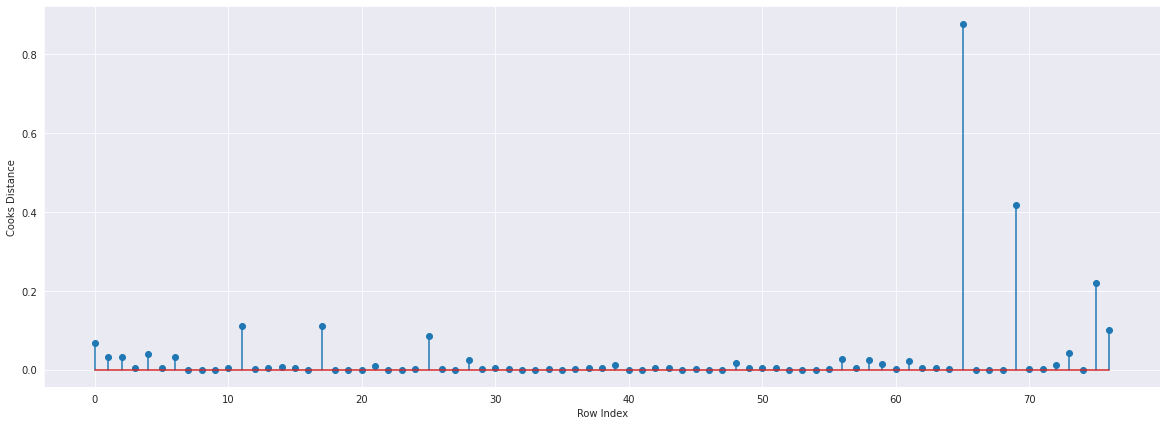

In [85]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [88]:
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296674)

Since the value is <1, we can stop the diagnostic process and finalize the model

In [90]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data=car4).fit()

In [91]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8669636111859063, 409.4153062719508)

##Predicting for new data

In [93]:
new_data= pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=['index 1'])

In [95]:
new_data

,HP,VOL,SP,WT
index 1,40,95,102,35


In [96]:
final_ml_V.predict(new_data)

index 1    46.035594
dtype: float64